TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

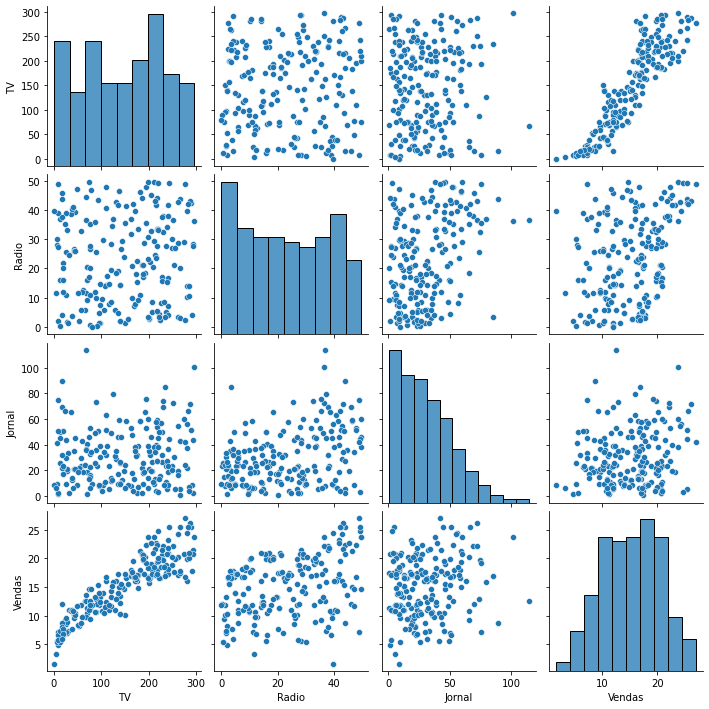

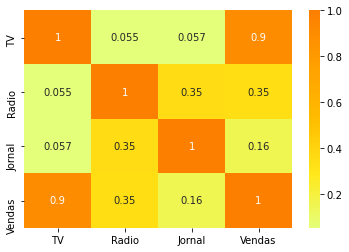

0.8626636438045542 0.916789559935083
3.227179673054646 1.9553091999999976


Vendas Reais  Previsão Random  Previsão Linear
0           15.2           14.159        14.897572
1           11.5           12.451        12.048804
2           20.6           19.701        17.287574
3           16.1           20.205        21.988351
4           19.6           18.710        20.410970
5           10.9           11.404        10.406904
6           20.1           18.461        20.396130
7            8.5            8.112         8.595111
8           13.6           13.698        12.809264
9           13.2           12.964        14.199537
10          15.6           16.673        16.260785
11          25.5           24.526        24.920406
12          17.6           17.376        15.003739
13          16.0           19.233        18.213347
14          18.0           19.063        17.384830
15          10.4           10.820        10.992533
16          12.6            9.640         8.972481
17          14.0           12.299        10.426374
18          27.0           25.280        25.103887
19          17.2           17.181        17.611796
20          18.4           18.587        18.619963
21          16.8           17.891        20.614055
22          16.1           17.109        16.778174
23          25.4           24.671        23.918277
24          10.1           15.693        13.305963
25          16.9           17.648        18.541339
26           4.8            5.660         5.268121
27          17.2           15.220        16.379943
28          16.0           15.316        14.945742
29          18.9           19.939        21.373021
30          10.8           10.924        10.735470
31           5.9            7.163         6.057999
32          20.2           20.092        21.634339
33          14.8           17.248        15.544855
34          17.7           17.930        20.087299
35           5.5            5.894         7.803326
36          18.4           18.483        18.398041
37          18.0           18.219        19.812413
38          12.4           11.539        12.289467
39          19.8           20.143        21.543260
40           6.7            6.928         6.870923
41          14.2           13.707        14.178691
42          22.1           22.147        21.491611
43          18.2           17.943        18.951751
44           9.6           10.008         9.548772
45          17.0           17.893        19.927704
46          17.4           20.212        21.573634
47          17.3           17.914        18.734443
48           8.7            8.979         8.420135
49          21.2           21.335        19.547868
50          10.9           10.618        10.596655
51          12.3           11.605        11.589745
52          20.8           20.008        23.093378
53          14.6           14.201        13.580273
54          15.9           14.259        15.506600
55          10.8           10.576        10.568809
56          12.9           12.032        13.933503
57          12.6           13.049        12.352992
58           7.3            6.414         8.900622
59          16.5           16.817        17.592067

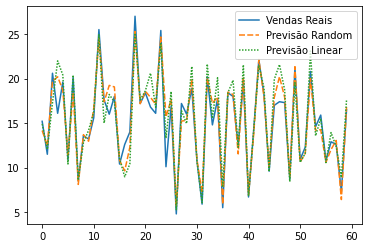


Tv,   Radio,   Jornal
[0.87129471 0.11532583 0.01337946]

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


<BarContainer object of 3 artists>

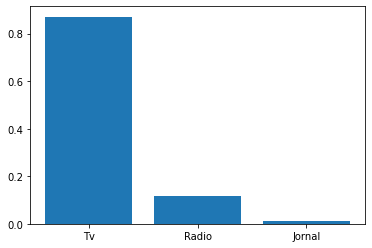

In [31]:
#obter dados
import pandas as pd

dados = pd.read_csv(r'/home/luan/Documentos/Python/inten 3/Aula 3-20210428T232017Z-001/advertising.csv')
display(dados)
plt.rcParams.update({'font.size': 10})


#tratamento de dados
display(dados.info())


#análise exploratoria (distribuição e correlação entre itens)
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(dados) # cria grafico 1
plt.show() # exibe grafico 1

sns.heatmap(dados.corr(), cmap = 'Wistia', annot = True) #cria grafico 2
plt.show() #exibe grafico 2


#modelagem (IA)
from sklearn.model_selection import train_test_split

x = dados.drop('Vendas', axis= 1)
y = dados['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)


#Regressão (linear, arvore de decisão)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression() # cria regressão linear
randomforest = RandomForestRegressor() # cria modelo de arvore de decisão

linear.fit(x_treino, y_treino) # treina
randomforest.fit(x_treino, y_treino) # treina


#testando a IA com R² e erro quadratico médio
from sklearn import metrics
teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear) # R²
r2_random = metrics.r2_score(y_teste, teste_random) # R²
print(r2_linear, r2_random)

erro_linear = metrics.mean_squared_error(y_teste, teste_linear) # erro
erro_random = metrics.mean_squared_error(y_teste, teste_random) # erro
print(erro_linear, erro_random)

#visualização gráfica
tabela_comparacao = pd.DataFrame()
tabela_comparacao['Vendas Reais'] = y_teste
tabela_comparacao['Previsão Random'] = teste_random
tabela_comparacao['Previsão Linear'] = teste_linear
tabela_comparacao = tabela_comparacao.reset_index(drop=True)
display(tabela_comparacao)

sns.lineplot(data=tabela_comparacao)
plt.show()

#qual a importancia de cada variavel para vendas
print()
print('Tv,   Radio,   Jornal')
print(randomforest.feature_importances_)
print()
#print(dados[['TV','Radio', 'Jornal']].sum())

#resultados
resultado = (dados[['TV', 'Radio', 'Jornal']].sum())
print(resultado)
informa = randomforest.feature_importances_
nome = ['Tv', 'Radio', 'Jornal']
plt.bar(nome, informa )

